In [1]:
import numpy as np

def predict_poly(x, coef):
    res = 0
    xx = [x ** (len(coef) - n - 1) for n in range(len(coef))]

x = np.arange(0, 10.1, 0.1) # board value is except
y = 1 / (1 + 10 * np.square(x))

x_train, y_train = x[::2], y[::2] # [::2] - choose second, fourth, sixth..

z_train = np.polyfit(x_train, y_train, 3) # calculate the coefs if we have only 3 of these
print(z_train)

[-0.00406535  0.0726068  -0.38709501  0.58524801]


Coefficients are increacing sharply in the end

In [2]:
z_train = np.polyfit(x_train, y_train, 5)
print(z_train)

[-3.80637846e-04  1.08126765e-02 -1.14188591e-01  5.49489716e-01
 -1.17447670e+00  8.71963966e-01]


# L2-regularizer

In [4]:
import numpy as np
import matplotlib.pyplot as plt 

x = np.arange(0, 10.1, 0.1)
y = np.array([a ** 3 - 10 * a ** 2 + 3 * a + 500 for a in x]) # function x^3 - 10x^2 + 3x + 500
x_train, y_train = x[::2], y[::2] # through one

N = 13 # the size of the feature space (poly degree = N - 1)
L = 0 # regularizer

X = np.array([[a ** n for n in range(N)] for a in x]) # the martrix of the input vectors
EL = np.array([[L if i == j else 0 for j in range(N)] for i in range(N)]) # identity matrix * L
EL[0][0] = 0 # we consider w0, consider the shift of hyperplanes

X_train = X[::2]
Y = y_train

# calculate the coefs by w = (X^T * X + lambda * E) ^ (-1) * X^T * Y
A = np.linalg.inv(X_train.T @ X_train + EL)
w = A @ X_train.T @ Y
print(w)

[-1.41587889e+02  1.29861946e+03 -4.92121252e+02  7.65656124e+01
 -6.13650777e+00  3.16033110e-01 -1.58123313e-02  1.27233668e-03
 -1.10792823e-04  6.79503082e-06 -3.09508091e-07  1.03361366e-08
 -1.58726603e-10]


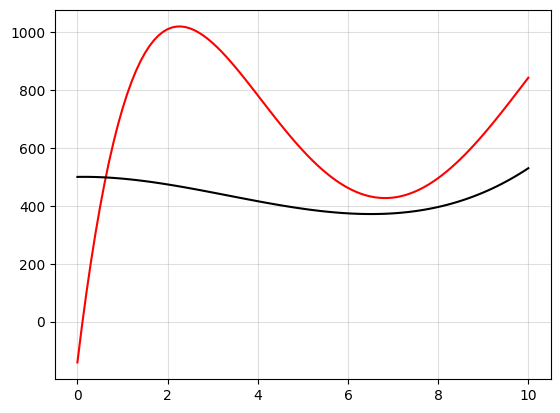

In [5]:
yy = [np.dot(w, x) for x in X]
plt.plot(x, yy, c='red') # predict
plt.plot(x, y, c='black')
plt.grid(True, alpha=0.4)

[ 5.05326059e+02 -5.36947341e+00  9.15403636e-02 -1.42507030e+00
 -1.07617037e+00 -1.86167241e-01  6.59246963e-01 -3.03982536e-01
  6.88843312e-02 -8.99838224e-03  6.91274221e-04 -2.91142344e-05
  5.20080956e-07]


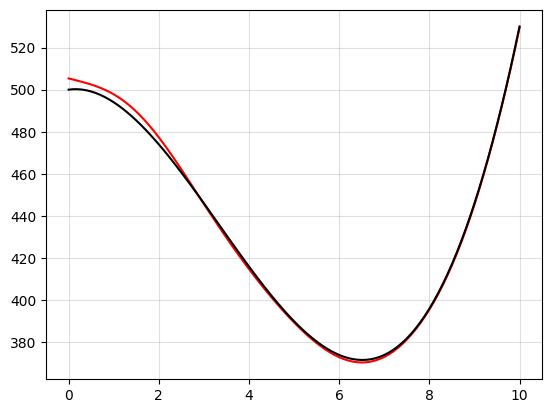

In [16]:
L = 20 # regularizer increase to 20

X = np.array([[a ** n for n in range(N)] for a in x]) # the martrix of the input vectors
EL = np.array([[L if i == j else 0 for j in range(N)] for i in range(N)]) # identity matrix * L
EL[0][0] = 0 # we consider w0, consider the shift of hyperplanes

X_train = X[::2]
Y = y_train

# calculate the coefs by w = (X^T * X + lambda * E) ^ (-1) * X^T * Y
A = np.linalg.inv(X_train.T @ X_train + EL)
w = A @ X_train.T @ Y
print(w)

yy = [np.dot(w, x) for x in X]
plt.plot(x, yy, c='red') # predict
plt.plot(x, y, c='black')
plt.grid(True, alpha=0.4)

# <img src=".././photo/condition15.png" alt="photo" width="672" height="400">

# <img src=".././photo/condition16.png" alt="photo" width="672" height="200">

In [ ]:
import numpy as np

def func(x):
    return 0.1 * x + 0.1 * x ** 2 - 0.5 * np.sin(2*x) + 1 * np.cos(4*x) + 10

x = np.arange(-3.0, 4.1, 0.1) # значения по оси абсцисс (Ox) с шагом 0,1
y = np.array(func(x)) # значения функции по оси ординат

N = 22  # размер признакового пространства (степень полинома N-1)
lm = 20  # параметр лямбда для L2-регуляризатора

X = np.array([[a ** n for n in range(N)] for a in x])  # матрица входных векторов
IL = lm * np.eye(N)  # матрица lambda*I
IL[0][0] = 0  # первый коэффициент не регуляризуем

X_train = X[::2]  # обучающая выборка (входы)
Y_train = y[::2]  # обучающая выборка (целевые значения)

w = np.linalg.inv(X_train.T @ X_train + IL) @ X_train.T @ Y_train
Q = np.mean([(np.dot(w, point) - func(point[1]))**2 for point in X]) # point[1] is a real x

print(w)
print(Q)
print(len(w), len(X[0]))

[ 9.43504289e+00 -3.57361097e-02  9.10473166e-02  2.18868762e-03
  5.10143799e-02  4.20846912e-03  1.28042129e-01  1.65388204e-02
  6.84549306e-02 -1.57564945e-02 -9.61808402e-02  1.16106284e-02
  3.30780535e-02 -4.15284979e-03 -5.43912596e-03  7.54559635e-04
  4.78204151e-04 -7.30031667e-05 -2.17255539e-05  3.60157269e-06
  4.02159053e-07 -7.14672011e-08]
0.2965193952075225
22 22


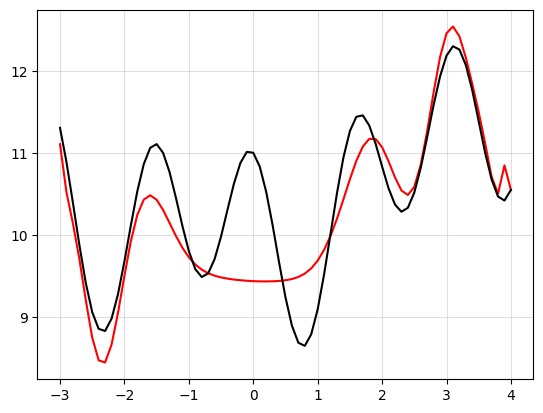

In [20]:
yy = [np.dot(w, x) for x in X]
plt.plot(x, yy, c='red') # predict
plt.plot(x, y, c='black')
plt.grid(True, alpha=0.4)

In [ ]:
import numpy as np

# исходная функция, которую нужно аппроксимировать моделью a(x)
def func(x):
    return 0.5 * x + 0.2 * x ** 2 - 0.05 * x ** 3 + 0.2 * np.sin(4 * x) - 2.5

# модель
def model(w, x):
    xv = np.array([x ** n for n in range(len(w))])
    return w.T @ xv

# функция потерь
def loss(w, x, y):
    return (model(w, x) - y) ** 2

# производная функции потерь
def dL(w, x, y):
    xv = np.array([x ** n for n in range(len(w))])
    return 2 * (model(w, x) - y) * xv

coord_x = np.arange(-4.0, 6.0, 0.1) # значения по оси абсцисс [-4; 6] с шагом 0.1
coord_y = func(coord_x) # значения функции по оси ординат

N = 5 # сложность модели (полином степени N-1)
lm_l2 = 2 # коэффициент лямбда для L2-регуляризатора
sz = len(coord_x)	# количество значений функций (точек)
eta = np.array([0.1, 0.01, 0.001, 0.0001, 0.000002]) # шаг обучения для каждого параметра w0, w1, w2, w3, w4
w = np.zeros(N) # начальные нулевые значения параметров модели
n_iter = 500 # число итераций алгоритма SGD
lm = 0.02 # значение параметра лямбда для вычисления скользящего экспоненциального среднего
batch_size = 20 # размер мини-батча (величина K = 20)

Qe = np.mean([(model(w, xi) - yi) ** 2 for xi, yi in zip(coord_x[:batch_size], coord_y[:batch_size])]) # начальное значение среднего эмпирического риска
np.random.seed(0) # генерация одинаковых последовательностей псевдослучайных чисел

for i in range(n_iter):
    k = np.random.randint(0, sz - batch_size - 1)
    
    Qk = 0
    diff_Qk = []
    for i in range(k, k + batch_size):
        # x_train = np.array([coord_x[i] ** n for n in range(N)])
        Qk += loss(w, coord_x[i], coord_y[i])
        diff_Qk.append(dL(w, coord_x[i], coord_y[i]))

    Qk /= batch_size
    diff_Qk = np.mean(diff_Qk, axis=0)

    w_curr = w.copy() # without copy w_curr = w, but it's the link on the w, not his copy, w it's vector, not number
    w_curr[0] = 0 # don't consider the shift
    w = w - eta * (diff_Qk + lm_l2 * w_curr) # with regularization L2

    Qe = lm * Qk + (1 - lm) * Qe

Q = np.mean([(model(w, xi) - yi) ** 2 for xi, yi in zip(coord_x, coord_y)])

print(w)
print(Qe)
print(Q)

[-2.43710903  0.16673647  0.19592597 -0.02461137 -0.00352843]
0.41677402549648346
0.2892829896920541


# We have different results with different L2 (lm_l2) parameter

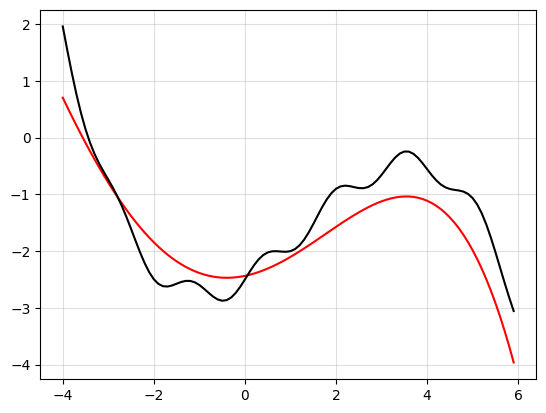

In [40]:
x_train = [[x ** n for n in range(N)] for x in coord_x]
yy = [np.dot(w, xv) for xv in x_train]
plt.plot(coord_x, yy, c='red') # predict
plt.plot(coord_x, coord_y, c='black')
plt.grid(True, alpha=0.4)